##Local receptive field

* 시신경이 받아들이는 자극을 가지고 느끼는 구조에서 영감을 얻어 만들어진 구조.
* 시각 신호가 연속적으로 뉴런들을 지나면서, 더 큰 수용장에 있는 패턴에 반응하는 식으로 인지됨.
* 각 위치에 있는 패턴이 뭐가 있는지 찾음. low level에서는 단순패턴을 찾고 high level로 올라갈수록 의미를 찾아감.
* 서로 재조합해서 더 복합한 패턴을 파악함.
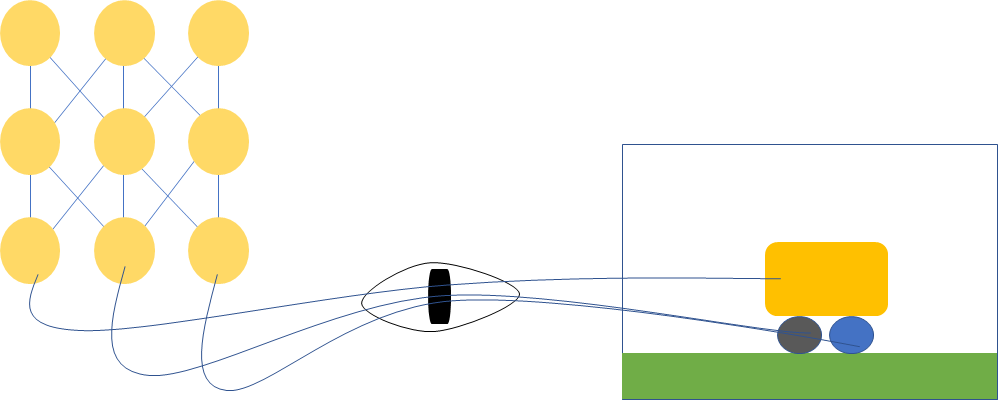

---

##Convolutional layer

* perceptron은 layer가 unit으로 설명이 되고, 여기서는 평면으로 설명이 됨. 그렇지만 MLP구조와 유사.
* 입력층이 low level이 되고, 합성곱 층이 높아질 수록 고수준이 됨.
* 첫번째 합성곱 층의 뉴런은 입력 이미지의 모든 픽셀에 연결되는 것이 아니라 각 뉴런의 수용장 안에 있는 픽셀에만 연결.
* 입력층이 low level이 되고, 합성곱 층이 높아질 수록 고수준이 됨.
* 두번째 합성곱 층의 뉴런은 첫번째 층의 작은 수용장 영역 안에 있는 픽셀에만 연결.
* 이런 구조는 네트워크가 첫번째 은닉층에서는 작은 저수준 특성에 집중하고, 그 다음 은닉층에서는 더 큰 고수준 특성으로 조합해 나가도록 도와줌.
* ***모든 픽셀에 연결되지 않는다!***
* 수용장 영역 안에서는 동일한 파라미터를 적용해서 계산해 패턴 파악.
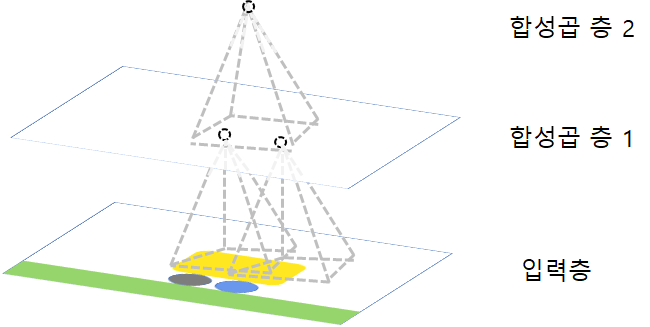


> 이렇게 수용장의 너비와 높이를 지정해 입력층의 값을 convolutional layer을 지나 이미지를 인식. 그렇지만 매 층을 지나 사각 수용장 내에서만 뉴런에 연결되서 이전 층에서 손실되는 값 존재. 이 손실을 줄이기 위해 패딩 기법 사용!




###1. 제로 패딩: 사이즈 같게
* 이전 층과 높이와 너비를 "같게" 하기 위해 입력의 주위에 0을 추가하게 되는 방식으로, 일반적으로 많이 쓰는 패딩 방식.
* 전후좌우로 확장시켜서 계산.

###2. Stride: 사이즈 축소
* 수용장 사이에 간격을 두어 큰 입력층을 더 작은 층에 연결하는 방법.
* 모델의 계산 복잡도를 낮춤. 파라미터 수를 적게해서 연산속도를 높이는 것.
* 한 수용장과 다음 수용장 사이의 간격을 stride라고 함.
* 저해상도 일때 의미있는 정보만 남긴다는 의미.

###3. Filter(convolutional kernel)
* 가중치 세트: 이전 층의 전체 뉴런에 적용되어 하나의 필터 당 하나의 특성 맵을 만들어 내고, 자동으로 훈련 시에 알아서 학습됨.
* 어떤 이미지를 필터를 통해 출력하게 되면, 필터가 강조하는 부분만 강조되고 나머지 부분은 희미해지는 효과가 있음.
* 이미지에 필터를 적용하여 나온 그림이 특성맵. 가장 크게 활성화시키는 이미지의 영역을 강조.
* 하나의 합성곱 층이 입력에 여러 필터를 동시에 적용하여 입력에 있는 여러 특성을 감지 가능.
* ***CNN이란 모든 뉴런이 가중치를 공유하는 필터를 학습하는 과정.***


###4. 여러 Feature map 쌓기
* 하나의 layer에서는 다양한 feature들을 사용함.
* 컬러 이미지는 보통 3D. 흑백이면 2D
* low level에서 색상에 대한 정보가 있을 때 상위 레벨에서는 단순한 패턴을 만드는 식으로 점점 조합해 나가는 방식.
* 고도화된 패턴에 대해서 detect 가능하고 각각의 feature map마다 다른 패턴을 인지하는 구조.
* 높이와 너비가 사이즈, 깊이는 채널(feature, 같은 dimension)을 의미.
* 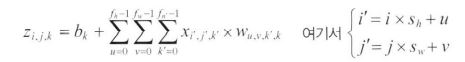
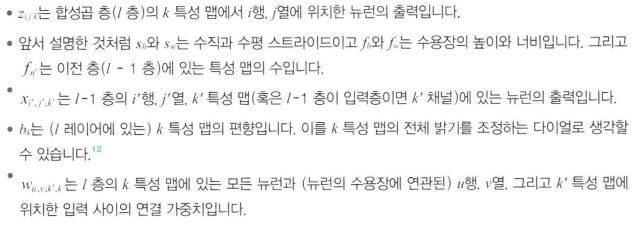

---
1. 입력 3차원, 출력 3차원
2. convolutional 연산 자체는 입력의 공간적으로 제한된 receptive field에 모든 파라미터를 다 곱해서 더해주는 element-wise 곱 연산?
3. 출력에서도 여러 feature들이 나와야 하기 때문에 파라미터는 3차원이 아니라 4차원...

먼지 모르겠음....ㅎ

---

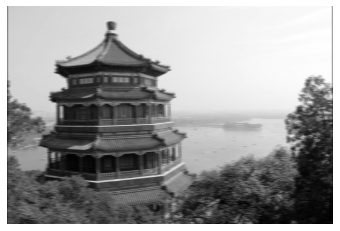

In [ ]:
import numpy as np
from sklearn.datasets import load_sample_image
import tensorflow as tf
import matplotlib.pyplot as plt
import keras

# 샘플 이미지를 로드합니다.
# 각 컬러 채널의 픽셀 강도는 0에서 255 사이의 값을 가진 바이트 하나로 표현되고 255로 나누어 0에서 1사이의 실수로 바꿈.
china = load_sample_image("china.jpg") / 255
flower = load_sample_image("flower.jpg") / 255
images = np.array([china, flower])
batch_size, height, width, channels = images.shape

# 2개의 필터를 만듭니다.
# 7x7필터를 만듬.
# 하나는 가운데 흰 수직선, 다른 하나는 가운데 흰 수평선 존재.
filters = np.zeros(shape=(7, 7, channels, 2), dtype=np.float32)
filters[:, 3, :, 0] = 1  # 수직선
filters[3, :, :, 1] = 1  # 수평선

outputs = tf.nn.conv2d(images, filters, strides=1, padding="SAME")
# tf.nn.conv2d() 함수로 이 필터를 두 이미지에 적용.
# valid: 합성곱 층에 제로 패딩 사용 안함. 스트라이드에 따라 입력 이미지의 행과 열이 무시될 수 있음. 
# 모든 뉴런의 수용장이 입력 안쪽 영역에만 놓인다는 것을 의미.
#

plt.imshow(outputs[0, :, :, 1], cmap="gray") # 첫 번째 이미지의 두 번째 특성맵을 그립니다.
plt.axis("off") # 책에는 없습니다.
plt.show()


In [ ]:
conv = keras.layers.Conv2D(filters=32, kernel_size=3, strides=1,
                           padding='same', activation='relu')

# 실제 CNN에서는 훈련 가능한 변수로 필터를 정의하기 때문에 신경망이 가장 잘 맞는 필터 학습 가능.
# CNN의 가중치를 학습할 때는 keras.layers.Conv2D 층 사용.
# 실제 layer 하나로 표현.
# Dense가 아닌 CNN의 가중치를 학습할때는 다음과 같이 표현하고 설정 값을 제대로 줘야 정상적인 물리적 동작이 가능.

##Pooling layer
* 목적: 계산량과 메모리 사용량, 파라미터 수를 줄이기 위해 입력 이미지의 부표본을 만드는 것.
* 풀링 층의 각 뉴런은 이전 층의 작은 사각 영역의 수용장 안에 있는 뉴런의 출력과 연결되서 이전과 동일하게 크기, 스트라이드, 패딩 유형을 지정해야 함
* BUT, 풀링 뉴런은 가중치가 없음. 합산 함수를 사용해 입력값을 더하는 것이 전부임.


###1. Max Pooling
* 계산량, 메모리 사용량, 파라미터 수 감소, 작은 변화에도 일정 수준의 불변성 효과/ 파괴적인 단점이 있음.
* 이동 불변성

In [ ]:
max_pool = keras.layers.MaxPool2D(pool_size=2)
# 2x2커널을 이용해 최대 풀링 층 만든 것.
# 스트라이드의 기본값은 커널 크기, 따라서 2 사용.
# 기본적으로 valid 패딩 사용.

###2. 평균 풀링 층
* AvgPool2D 사용.
* 일반적으로 최대 풀링 층이 성능이 더 좋음.
* 최대 풀링 층이 강령한 이동 불변성을 제공하고 연산 비용이 조금 덜 듦.
* 희석 효과 발생.

###3. Depthwise max pooling
* 최대 풀링과 평균풀링은 공간 차원이 아니라 깊이 차원으로 수행 가능.
* CNN이 다양한 특성에 대한 불변성 학습 가능.
* 예시로 동일 패턴이 회전된 여러 가지 필터를 학습했을 때 깊이 방향 최대 풀링층은 회전에 상관없이 동일 출력을 만들고, 비슷하게 두께, 밝기, 왜곡, 색상 어 떤 것에 대해서도 불변성 학습 가능.


In [ ]:
# 일반적으로 구현한 깊이방향 최대 풀링층
output = tf.nn.max_pool(images,
                        ksize=(1, 1, 1, 3),
                        strides=(1, 1, 1, 3),
                        padding='VALID')

# 케라스 모델의 층으로 사용한 깊이방향 최대 풀링층
depth_pool = keras.layers.Lambda(
    lambda X : tf.nn.max_pool(X, ksize=(1,1,1,3), strides=(1,1,1,3),
                             paddig='VALID'))

# feature들 사이에서 중요한 것을 찾기 위한 방법.
# 특징 중에서 가장 강력한 특징 하나만 기억하도록.
# 공간적인 사이즈가 줄었던 앞의 방법과 다르게 채널의 갯수 줄임.


###4. Global average pooling
* 현대적인 신경망 구조에서 종종 보게 될 구조.
* 각 특성 맵의 평균을 계산. 각 샘플의 특성 맵마다 하나의 숫자를 출력. 
* 파괴적인 연산이지만 출력층에는 유용할 수 있음.

In [ ]:
# 일반적으로 구현한 전역 평균 풀링층
global_avg_pool = keras.layers.GlobalAvgPool2D()

# 케라스 모델의 층으로 사용한 전역 평균 풀링층
global_avg_pool = keras.layers.Lambda(lambda X : tf.reduce_mean(X, axis=[1,2]))

##CNN 구조
* 전형적인 CNN 구조는 다음과 같음.
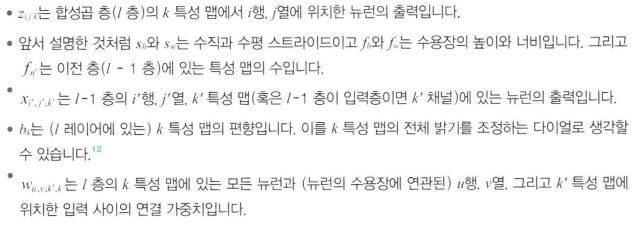
* 네트워크 통과하여 진행할수록 이미지 점점 작아지고, 합성곱 층 때문에 일반적으로 점점 더 깊어짐.(더 많은 feature 특성 맵을 가짐)
* convolutional layer: filter map에서 파라미터가 정의한 분석 결과를 얻을 수 있음. low level의 feature을 찾고 크기를 줄임. 패턴이 고도화 되면서 모든 정보를 가질 필요가 없기 때문에.
* max pooling: 대표값을 뽑아 분석하기 좋게 만들 수 있음. 압축!


In [ ]:
model = keras.models.Sequential([
    keras.layers.Conv2D(64, 7, activation='relu', padding='same',
                       input_shape=[28,28,1]),
    # 첫번째 층에 64개의 큰 필터(7x7)와 스트라이드 1을 사용 
    keras.layers.MaxPooling2D(2),
    # 그 다음 풀링 크기가 2인 최대 풀링 층을 쌓아 공간 방향 차원을 절반으로 줄임. 
    # 이와 동일한 구조를 두 번 반복.
    keras.layers.Conv2D(128, 3, activation='relu', padding='same'),
    keras.layers.Conv2D(128, 3, activation='relu', padding='same'),
    keras.layers.MaxPooling2D(2),
    keras.layers.Conv2D(256, 3, activation='relu', padding='same'),
    keras.layers.Conv2D(256, 3, activation='relu', padding='same'),
    keras.layers.MaxPooling2D(2),
    keras.layers.Flatten(),
    # CNN이 출력층에 다다를수록 필터 개수가 늘어남. 
    # Dense 네트워크는 샘플의 특성으로 1D를 기대해서 입력을 일렬로 펼침.
    # Dense 사이의 과대적합을 막기 위해 50% 드롭아웃 비율을 가진 층 추가
    keras.layers.Dense(128, activation='relu'),
    keras.layers.Dropout(0.5),
    keras.layers.Dense(64, activation='relu'),
    keras.layers.Dropout(0.5),
    keras.layers.Dense(10, activation='softmax')
])

